<h1 align="center"><font size="15">LINEAR REGRESSION WITH TENSORFLOW</font></h1>


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

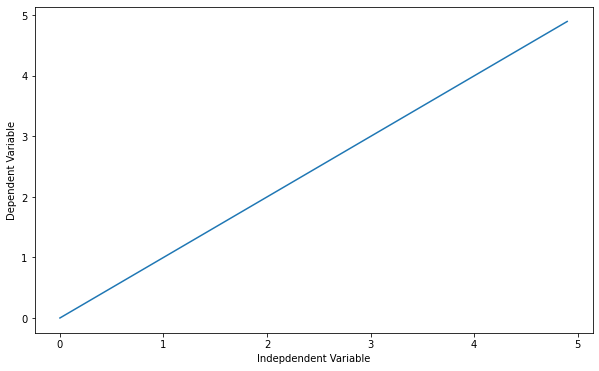

In [3]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-03-10 19:02:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2023-03-10 19:02:03 (1.99 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Understanding the Data

FuelConsumption.csv:

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

MODELYEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [5]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [7]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_x

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [8]:
train_y = np.asanyarray(df[['CO2EMISSIONS']])
train_y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]])

In [9]:
a = tf.Variable(20.0)
a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>

In [10]:
b = tf.Variable(30.2)
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=30.2>

In [11]:
def h(x):
   y = a*x + b
   return y

In [12]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

In [13]:
learning_rate = 0.01
train_data = []
loss_values =[]
a_values = []
b_values = []
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

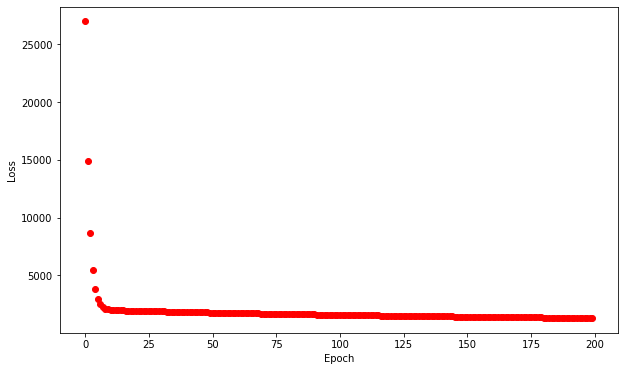

In [14]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

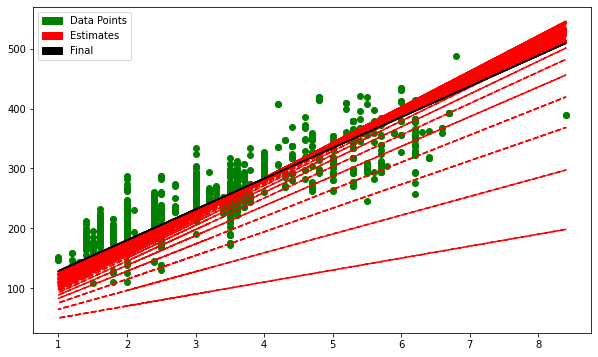

In [15]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()